In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', 
names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary'])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.groupby('sex').sex.count()

sex
 Female    10771
 Male      21790
Name: sex, dtype: int64

In [4]:
df[df['sex'] == ' Male'].age.mean()

39.43354749885268

In [5]:
num = df.native_country.count()
us_num = df[df['native_country'] == ' United-States'].native_country.count()
us_num / num * 100

89.5857006848684

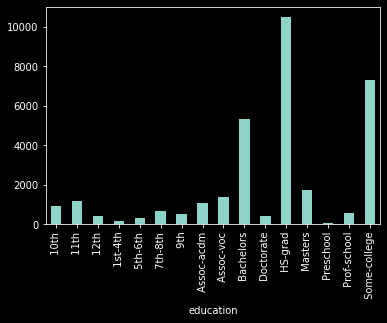

In [6]:
ed_group = df.groupby('education').education.count()
ed_group.plot.bar(x='education')

In [7]:
df[df['marital_status'] == ' Divorced'].fnlwgt.agg(['mean', 'std'])

mean    185802.790457
std     105646.789459
Name: fnlwgt, dtype: float64

'Из диаграммы ясно, что большая часть людей, получающих зарплату более 50К, имеет высшее образование'

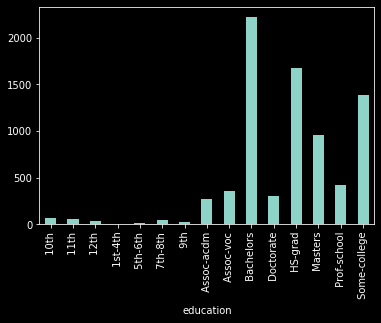

In [8]:
group = df[df['salary'] == ' >50K'].groupby('education').education.count()
group.plot.bar(x='education')
"Из диаграммы ясно, что большая часть людей, получающих зарплату более 50К, имеет высшее образование"

In [9]:
df.groupby(['race', 'sex']).age.max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

In [11]:
df[df['occupation'] == ' Farming-fishing'].groupby('native_country').native_country.count()

native_country
 ?                  5
 Cambodia           1
 Canada             2
 Cuba               2
 El-Salvador        2
 England            1
 France             1
 Germany            1
 Guatemala          4
 Hong               1
 Ireland            1
 Italy              2
 Japan              1
 Mexico            77
 Philippines        4
 Poland             1
 Portugal           1
 Puerto-Rico        5
 United-States    879
 Vietnam            2
 Yugoslavia         1
Name: native_country, dtype: int64

In [33]:
print('Соотношение мужчин больше соотношения женщин')
df[df['education'] == ' Bachelors'].groupby('sex').sex.count() / df[df['education'] == ' Masters'].groupby('sex').sex.count()

Соотношение мужчин больше соотношения женщин


sex
 Female    3.020522
 Male      3.147430
Name: sex, dtype: float64

In [31]:
max_hours = df['hours_per_week'].max()
print('Самое большое число рабочих часов в неделю -', max_hours)
max_workers = df[df['hours_per_week'] == max_hours]
print('Число людей, работающих больше всего часов в неделю -', max_workers['salary'].count())
max_workers['salary']

Самое большое число рабочих часов в неделю - 99
Число людей, работающих больше всего часов в неделю - 85


935        >50K
1172       >50K
1887       >50K
3578       >50K
4086      <=50K
          ...  
30992     <=50K
31681      >50K
31699     <=50K
32469     <=50K
32531     <=50K
Name: salary, Length: 85, dtype: object